In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

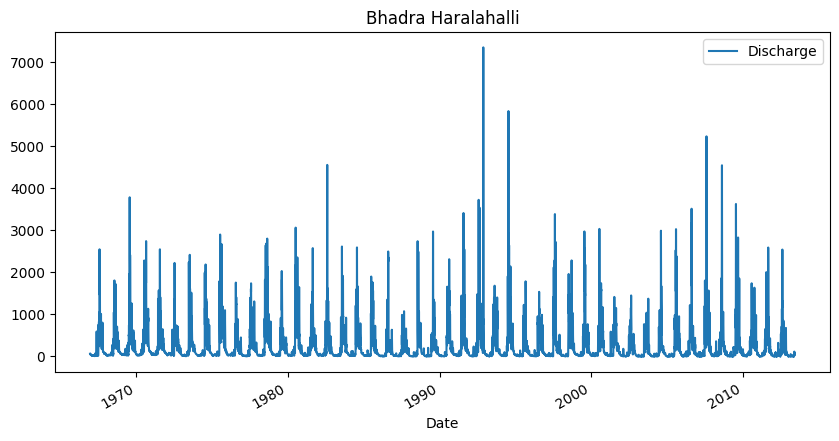

In [52]:
# Read data from csv file, data has 2 columns: Date and Discharge(cumsecs)
# Date is in dd/mm/yyyy format or dd-mm-yyyy format
# Some data values are missing or zero, use linear interpolation to fill them
df = pd.read_csv('./data/cleaned_data.csv', header=0, names=['Date', 'Discharge'])
# remove commas from discharge values and convert them to float
df['Discharge'] = df['Discharge'].str.replace(',', '').str.replace('"', '').astype(float)
# df['Discharge'] = df['Discharge'].replace(0, np.nan).interpolate(method='linear')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.set_index('Date')
# take values from June 2004 to December 2006
df.plot(figsize=(10, 5), title='Bhadra Haralahalli')
plt.show()

<Axes: title={'center': 'Bhadra Haralahalli'}, xlabel='Date'>

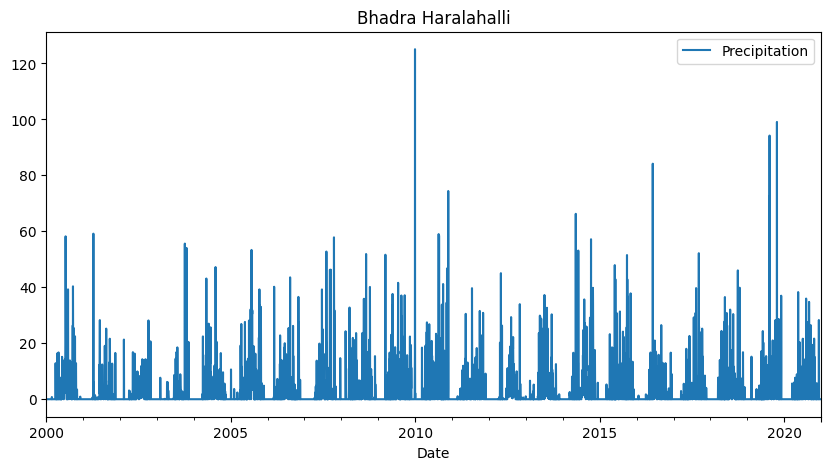

In [53]:
# Read data from csv file, data has 2 columns: Date and Precipitation(mm)
# Date is in yyyy-mm-dd format
precipitation_df = pd.read_csv('./data/precipitation_full.csv', header=0, names=['Date', 'Precipitation'])
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'], format='%Y-%m-%d')
precipitation_df = precipitation_df.set_index('Date')

# take values from June 2004 to December 2006
precipitation_df.plot(figsize=(10, 5), title='Bhadra Haralahalli')

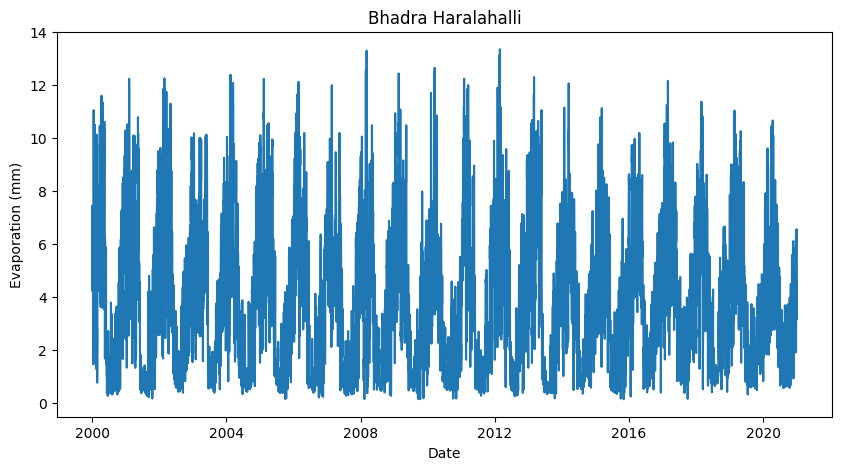

In [54]:
# Read data from csv file, data has 2 columns: Date and Evaporation
# Date is in yyyy/mm/dd format
evaporation_df = pd.read_csv('./data/evaporation_cleaned.csv', header=0, names=['Date', 'Evaporation'])
evaporation_df['Date'] = pd.to_datetime(evaporation_df['Date'], format='mixed')
evaporation_df = evaporation_df.set_index('Date')


# plot the data
plt.figure(figsize=(10, 5))
plt.plot(evaporation_df['Evaporation'])
plt.xlabel('Date')
plt.ylabel('Evaporation (mm)')
plt.title('Bhadra Haralahalli')
plt.show()

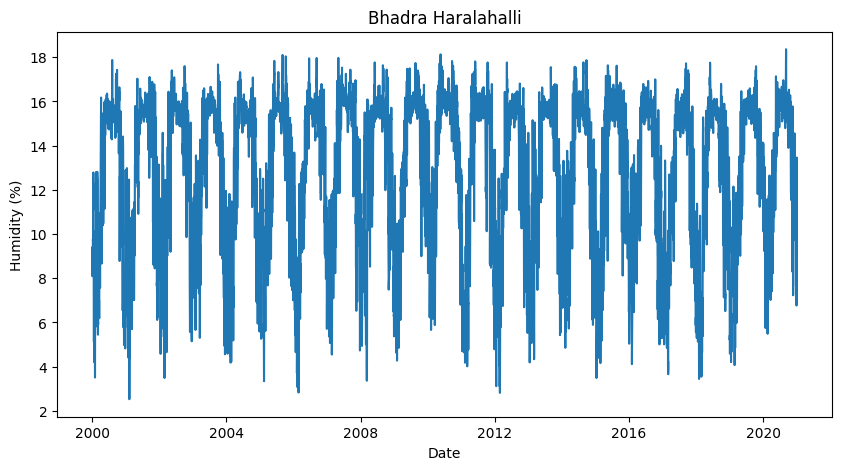

In [55]:
# Read data from csv file, data has 2 columns: Date and Humidity
# Date is in yyyy-mm-dd format
humidity_df = pd.read_csv('./data/humidity_cleaned.csv', header=0, names=['Date', 'Humidity'])
humidity_df['Date'] = pd.to_datetime(humidity_df['Date'], format='%Y-%m-%d')
humidity_df = humidity_df.set_index('Date')

# plot the data
plt.figure(figsize=(10, 5))
plt.plot(humidity_df['Humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Bhadra Haralahalli')
plt.show()


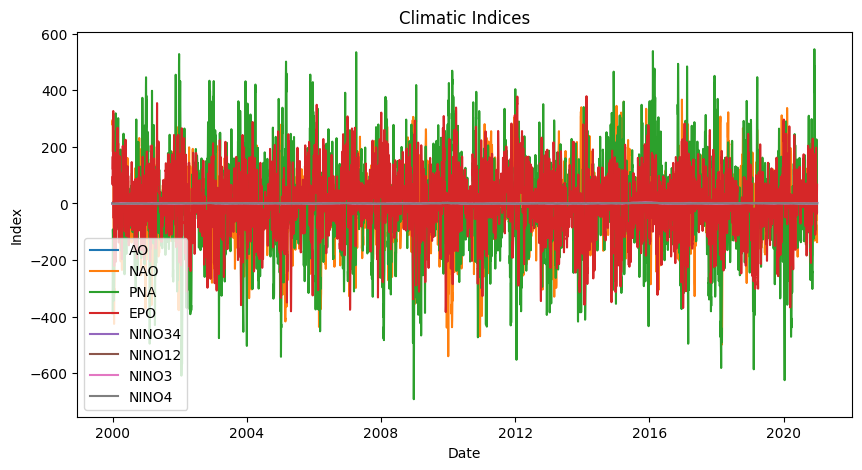

In [56]:
# read data from data.csv which has following columns - Date,AO,NAO,PNA,EPO,NINO34,NINO12,NINO3,NINO4
# Date is in yyyy-mm-dd format
climatic_df = pd.read_csv('./data/data.csv', header=0, names=['Date', 'AO', 'NAO', 'PNA', 'EPO', 'NINO34', 'NINO12', 'NINO3', 'NINO4'], parse_dates=['Date'])
climatic_df['Date'] = pd.to_datetime(climatic_df['Date'], format='%Y-%m-%d')
climatic_df = climatic_df.set_index('Date')

# plot the data
plt.figure(figsize=(10, 5))
plt.plot(climatic_df['AO'], label='AO')
plt.plot(climatic_df['NAO'], label='NAO')
plt.plot(climatic_df['PNA'], label='PNA')
plt.plot(climatic_df['EPO'], label='EPO')
plt.plot(climatic_df['NINO34'], label='NINO34')
plt.plot(climatic_df['NINO12'], label='NINO12')
plt.plot(climatic_df['NINO3'], label='NINO3')
plt.plot(climatic_df['NINO4'], label='NINO4')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Climatic Indices')
plt.show()

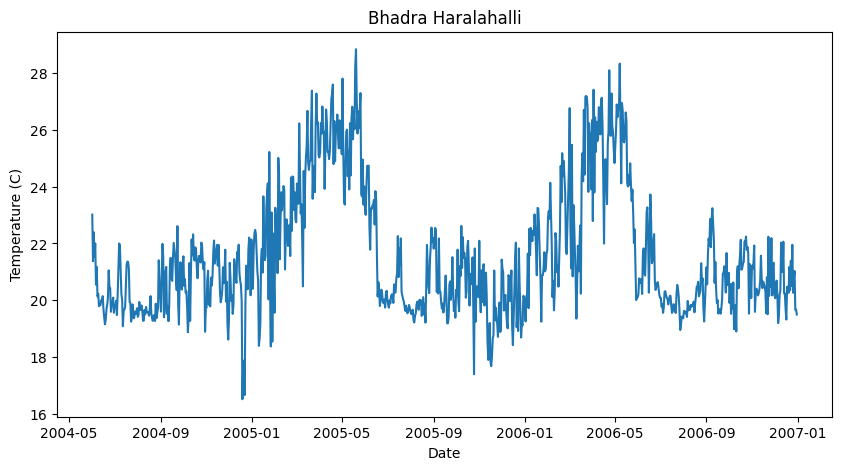

In [57]:
# Read data from csv file, data has 2 columns: Date and Mean Temperature
# Date is in yyyy-mm-dd format
temperature_df = pd.read_csv('./data/mean_temp.csv', header=0, names=['Date', 'Temperature'])
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'], format='%Y-%m-%d')
temperature_df = temperature_df.set_index('Date')


# plot the data
plt.figure(figsize=(10, 5))
plt.plot(temperature_df['Temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Bhadra Haralahalli')
plt.show()


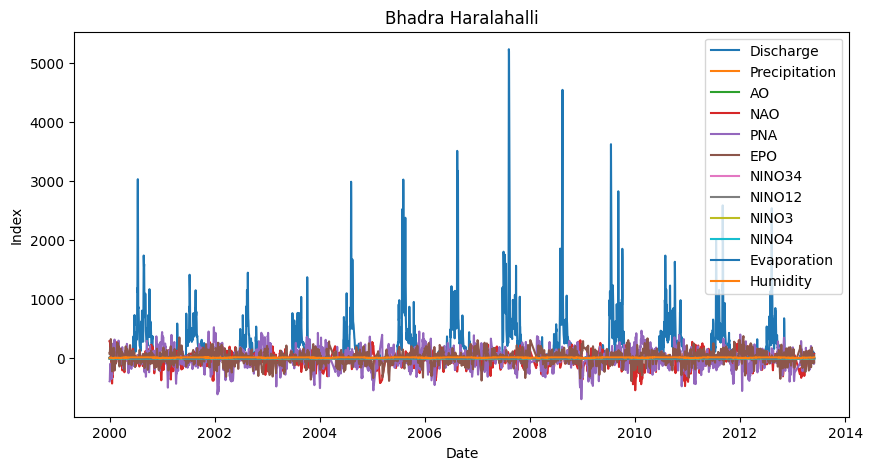

In [58]:
# merge discharge, precipitation, climatic data, evaporation data and humidity data and temperature data
df = pd.merge(df, climatic_df, how='inner', left_index=True, right_index=True)
df = pd.merge(df, precipitation_df, how='inner', left_index=True, right_index=True)
df = pd.merge(df, evaporation_df, how='inner', left_index=True, right_index=True)
df = pd.merge(df, humidity_df, how='inner', left_index=True, right_index=True)
# df = pd.merge(df, temperature_df, how='inner', left_index=True, right_index=True)

# plot the data
plt.figure(figsize=(10, 5))
plt.plot(df['Discharge'], label='Discharge')
plt.plot(df['Precipitation'], label='Precipitation')
plt.plot(df['AO'], label='AO')
plt.plot(df['NAO'], label='NAO')
plt.plot(df['PNA'], label='PNA')
plt.plot(df['EPO'], label='EPO')
plt.plot(df['NINO34'], label='NINO34')
plt.plot(df['NINO12'], label='NINO12')
plt.plot(df['NINO3'], label='NINO3')
plt.plot(df['NINO4'], label='NINO4')
plt.plot(df['Evaporation'], label='Evaporation')
plt.plot(df['Humidity'], label='Humidity')
# plt.plot(df['Temperature'], label='Temperature')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Bhadra Haralahalli')
plt.show()

df = df.loc['2004-01-01':'2010-12-31']
df = df.dropna()
df_nolag = df.copy()
temp = df.columns.copy()
max_lag = 7 
for col in df:
    for lag in range(1, max_lag + 1):
        df[col + '_lag' + str(lag)] = df[col].shift(lag)
df = df.dropna()




In [59]:
print(df.columns)
print(df.columns.shape)



Index(['Discharge', 'AO', 'NAO', 'PNA', 'EPO', 'NINO34', 'NINO12', 'NINO3',
       'NINO4', 'Precipitation', 'Evaporation', 'Humidity', 'Discharge_lag1',
       'Discharge_lag2', 'Discharge_lag3', 'Discharge_lag4', 'Discharge_lag5',
       'Discharge_lag6', 'Discharge_lag7', 'AO_lag1', 'AO_lag2', 'AO_lag3',
       'AO_lag4', 'AO_lag5', 'AO_lag6', 'AO_lag7', 'NAO_lag1', 'NAO_lag2',
       'NAO_lag3', 'NAO_lag4', 'NAO_lag5', 'NAO_lag6', 'NAO_lag7', 'PNA_lag1',
       'PNA_lag2', 'PNA_lag3', 'PNA_lag4', 'PNA_lag5', 'PNA_lag6', 'PNA_lag7',
       'EPO_lag1', 'EPO_lag2', 'EPO_lag3', 'EPO_lag4', 'EPO_lag5', 'EPO_lag6',
       'EPO_lag7', 'NINO34_lag1', 'NINO34_lag2', 'NINO34_lag3', 'NINO34_lag4',
       'NINO34_lag5', 'NINO34_lag6', 'NINO34_lag7', 'NINO12_lag1',
       'NINO12_lag2', 'NINO12_lag3', 'NINO12_lag4', 'NINO12_lag5',
       'NINO12_lag6', 'NINO12_lag7', 'NINO3_lag1', 'NINO3_lag2', 'NINO3_lag3',
       'NINO3_lag4', 'NINO3_lag5', 'NINO3_lag6', 'NINO3_lag7', 'NINO4_lag1',
       'NI

In [60]:
# Code for extracting important features

# Specify the threshold for feature importance

# Function to perform feature extraction using Random Forest
def perform_feature_extraction(data, target_column, feature_importance_threshold=0.0025):
    # Split the data into features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest regressor
    rf_regressor = RandomForestRegressor()

    # Train the Random Forest model
    rf_regressor.fit(X_train, y_train)

    # Get feature importance scores
    feature_importances = rf_regressor.feature_importances_

    # Create a DataFrame with feature names and their importance scores
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # Select features above the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= feature_importance_threshold]['Feature']

    # Display selected features
    print("Selected Features:")
    print(selected_features)

    # Create a new DataFrame with selected features and the target column
    selected_data = data[['Discharge'] + list(selected_features)]

    return selected_data

# Example usage for Bhadra reservoir
df = perform_feature_extraction(df, 'Discharge')
df_nolag = perform_feature_extraction(df_nolag, 'Discharge')



Selected Features:
2                    PNA
8          Precipitation
11        Discharge_lag1
12        Discharge_lag2
18               AO_lag1
29              NAO_lag5
32              PNA_lag1
55           NINO12_lag3
74    Precipitation_lag1
75    Precipitation_lag2
81      Evaporation_lag1
82      Evaporation_lag2
84      Evaporation_lag4
85      Evaporation_lag5
Name: Feature, dtype: object
Selected Features:
0                AO
1               NAO
2               PNA
3               EPO
4            NINO34
5            NINO12
6             NINO3
7             NINO4
8     Precipitation
9       Evaporation
10         Humidity
Name: Feature, dtype: object


            Discharge     PNA  Precipitation  Discharge_lag1  Discharge_lag2  \
Date                                                                           
2004-01-08       0.00  115.71            0.0            0.00            0.00   
2004-01-09       0.00  296.32            0.0            0.00            0.00   
2004-01-10       0.00  352.77            0.0            0.00            0.00   
2004-01-11       0.00  214.55            0.0            0.00            0.00   
2004-01-12       0.00  105.07            0.0            0.00            0.00   
...               ...     ...            ...             ...             ...   
2010-12-27      76.98  125.75            0.0           76.82           56.59   
2010-12-28      70.99  -69.50            0.0           76.98           76.82   
2010-12-29      62.21 -299.61            0.0           70.99           76.98   
2010-12-30      61.03 -251.80            0.0           62.21           70.99   
2010-12-31      61.23 -212.98           

<Axes: xlabel='Date'>

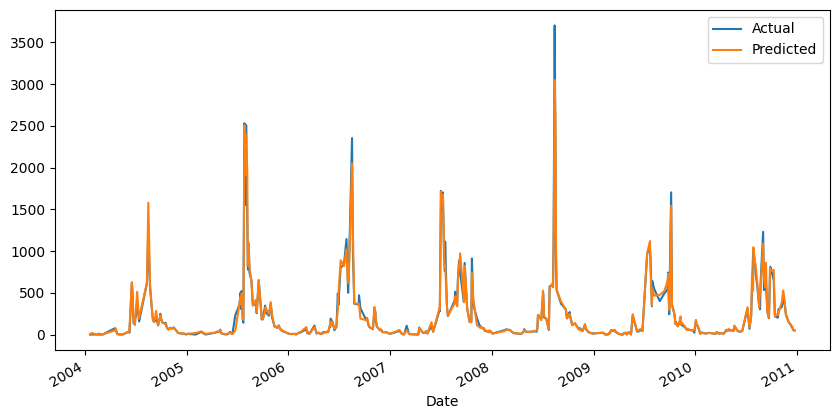

In [61]:
# Split data in to X and y
print(df)
y = df['Discharge']
X = df.drop('Discharge', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using each model
rf_predictions = rf_model.predict(X_test)

# Evaluate each model's predictions
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Model Mean Squared Error: {rf_mse}")

y_pred = rf_predictions
min_mse = rf_mse
best_rf_model = rf_model

# Iterative improvement run for 100 iterations
for i in range(100):
    # Create a new bootstrapped dataset
    X_train_bootstrap, _, y_train_bootstrap, _ = train_test_split(X, y, test_size=0.2, random_state=None)

    # Retrain the model with the new dataset
    rf_model.fit(X_train_bootstrap, y_train_bootstrap)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE)
    rf_mse = mean_squared_error(y_test, y_pred)
    print(f"Current Mean Squared Error: {rf_mse}")
    min_mse = min(min_mse, rf_mse)
    if min_mse == rf_mse:
        best_rf_model = rf_model

# Final model with satisfactory accuracy
print("Best Model mse:")
print(min_mse)

# Make predictions using the best model
y_pred = best_rf_model.predict(X_test)
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_res.plot(figsize=(10, 5))

Gradient Boosting Model Mean Squared Error: 15663.090211030443
Current Mean Squared Error: 19039.143513081293
Current Mean Squared Error: 12681.742661897526
Current Mean Squared Error: 14327.71924062245
Current Mean Squared Error: 17399.396449313375
Current Mean Squared Error: 15341.488218796116
Current Mean Squared Error: 16281.880004836665
Current Mean Squared Error: 14649.283706829294
Current Mean Squared Error: 13775.397269921323
Current Mean Squared Error: 14668.278114638022
Current Mean Squared Error: 14887.04737640734
Current Mean Squared Error: 15412.513939177785
Current Mean Squared Error: 13802.229819317052
Current Mean Squared Error: 14135.20680547901
Current Mean Squared Error: 14613.175500657726
Current Mean Squared Error: 20541.546871877534
Current Mean Squared Error: 20548.029109619565
Current Mean Squared Error: 17730.617264519966
Current Mean Squared Error: 13636.274665370616
Current Mean Squared Error: 16833.093648210517
Current Mean Squared Error: 12102.1408835675
Cu

<Axes: title={'center': 'Bhadra Haralahalli'}, xlabel='Date'>

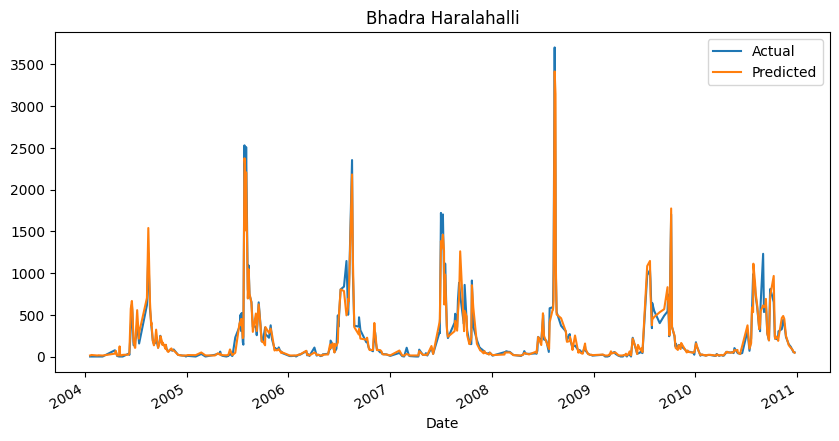

In [62]:
# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

gbr_predictions = gbr_model.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
print(f"Gradient Boosting Model Mean Squared Error: {gbr_mse}")

# Initialize variables to track the best model and minimum MSE
best_gbr_model = gbr_model
min_mse = gbr_mse
best_preds = gbr_predictions

# Iterative improvement run for 100 iterations
for i in range(100):
    # Create a new bootstrapped dataset
    X_train_bootstrap, _, y_train_bootstrap, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=None)

    # Retrain the GBR model with the new dataset
    gbr_model.fit(X_train_bootstrap, y_train_bootstrap)

    # Make predictions on the test set
    y_pred = gbr_model.predict(X_test)

    # Evaluate the model using Mean Squared Error (MSE)
    gbr_mse = mean_squared_error(y_test, y_pred)
    print(f"Current Mean Squared Error: {gbr_mse}")

    # Update the best model if the current MSE is the lowest
    if gbr_mse < min_mse:
        min_mse = gbr_mse
        best_gbr_model = gbr_model
        best_preds = y_pred

# Final model with satisfactory accuracy
print("Best Model rmse:")
print(min_mse)

df_res = pd.DataFrame({'Actual': y_test, 'Predicted': best_preds})
df_res.plot(figsize=(10, 5), title='Bhadra Haralahalli')


In [63]:
# Combine predictions using Weighted Voting Ensemble Model (WVEM)
# Adjust weights based on the performance of each model
ensemble_predictions = (0.5 * rf_predictions) + (0.5 * gbr_predictions)

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
print(f"Ensemble Model Mean Squared Error: {ensemble_mse}")

Ensemble Model Mean Squared Error: 15390.836573006796


               PNA  Precipitation  Discharge_lag1  Discharge_lag2  AO_lag1  \
Date                                                                         
2004-01-08  115.71            0.0             0.0             0.0    0.640   
2004-01-09  296.32            0.0             0.0             0.0    0.428   
2004-01-10  352.77            0.0             0.0             0.0    0.633   
2004-01-11  214.55            0.0             0.0             0.0    1.421   
2004-01-12  105.07            0.0             0.0             0.0    1.660   

            NAO_lag5  PNA_lag1  NINO12_lag3  Precipitation_lag1  \
Date                                                              
2004-01-08    -37.61     28.54     0.271774                 0.0   
2004-01-09    -23.11    115.71     0.384610                 0.0   
2004-01-10     10.92    296.32     0.485699                 0.0   
2004-01-11     -7.18    352.77     0.490132                 0.0   
2004-01-12    -16.03    214.55     0.482904        

<Axes: xlabel='Date'>

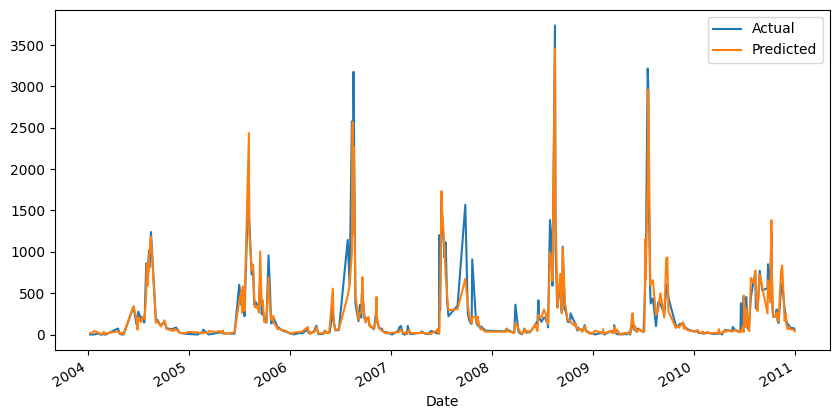

In [64]:
from sklearn.neighbors import KNeighborsRegressor

# Split data into X and y
y = df['Discharge']
X = df.drop('Discharge', axis=1)

print(X.head())
print(y.head())
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=7)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f"KNN Model Mean Squared Error: {knn_mse}")

df_res = pd.DataFrame({'Actual': y_test, 'Predicted': knn_predictions})
df_res.plot(figsize=(10, 5))


               Discharge        AO       NAO       PNA       EPO    NINO34  \
Discharge       1.000000 -0.073878  0.036808  0.024972  0.003648 -0.042283   
AO             -0.073878  1.000000  0.064517 -0.120377  0.011877 -0.176335   
NAO             0.036808  0.064517  1.000000 -0.119885  0.070269 -0.034759   
PNA             0.024972 -0.120377 -0.119885  1.000000  0.039555  0.180183   
EPO             0.003648  0.011877  0.070269  0.039555  1.000000 -0.082841   
NINO34         -0.042283 -0.176335 -0.034759  0.180183 -0.082841  1.000000   
NINO12         -0.028043 -0.043412  0.020430  0.077212 -0.012837  0.507245   
NINO3          -0.019815 -0.119220  0.001610  0.163270 -0.062301  0.899872   
NINO4          -0.055644 -0.193949 -0.010977  0.138040 -0.068308  0.929625   
Precipitation   0.272451 -0.020560  0.021059 -0.020575  0.009282 -0.021573   
Evaporation    -0.426324 -0.007801 -0.021700 -0.002011 -0.008791 -0.023305   
Humidity        0.326178  0.036024  0.111666 -0.006181  0.017328

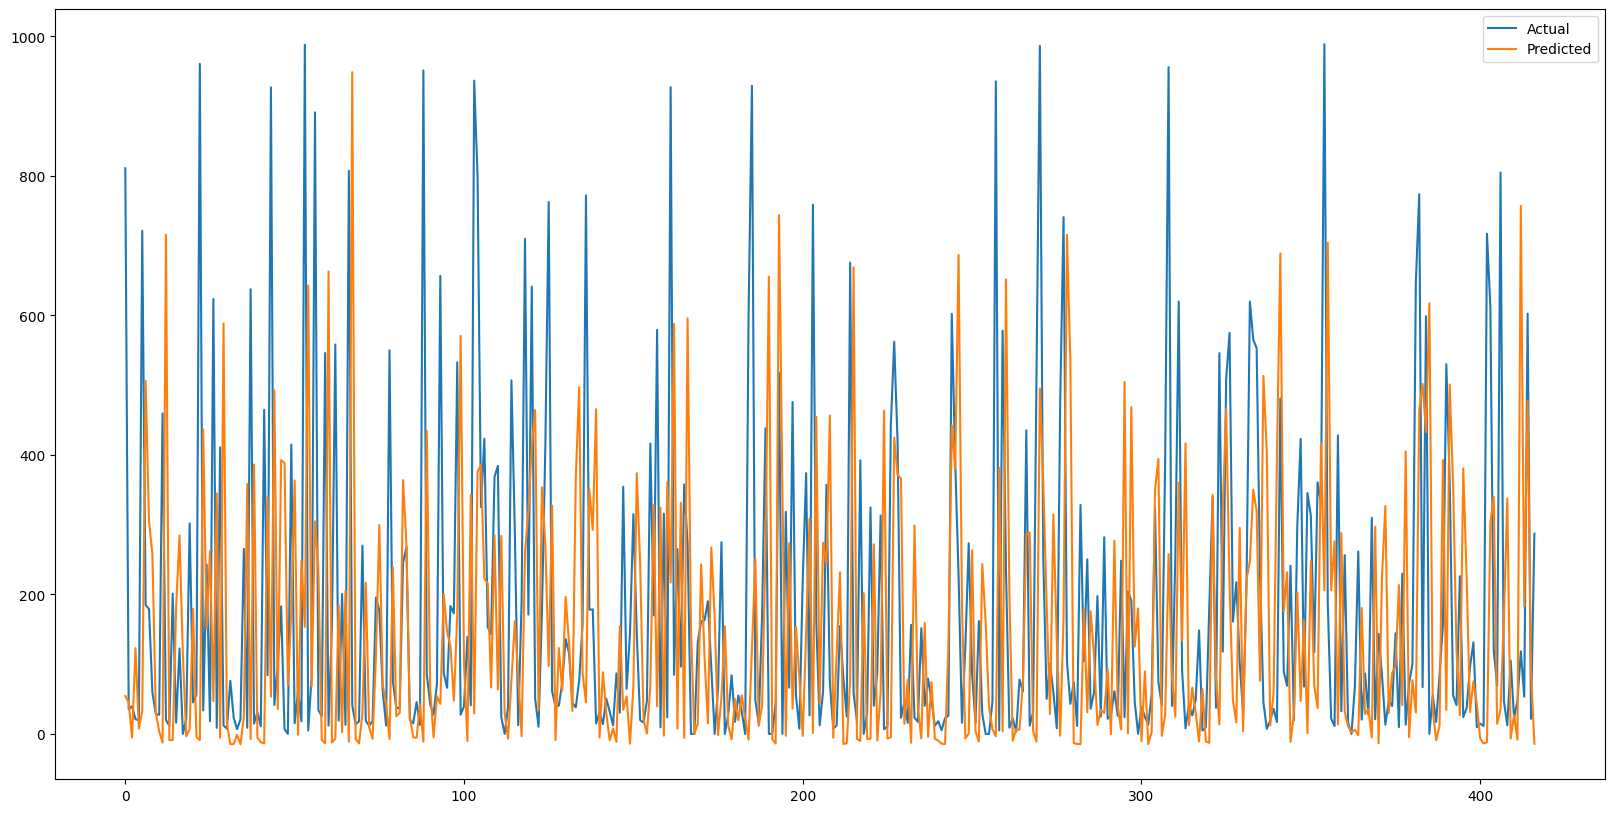

In [66]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

fixed_time_step = 7

# print(df.columns)

df_copy = df_nolag.copy()
df_copy = df_copy.dropna()

# drop all lag columns

for col in df_copy.columns:
    if 'lag' in col:
        df_copy = df_copy.drop(col, axis=1)

X = df_copy.drop('Discharge', axis=1).values
Y = df_copy['Discharge'].values.reshape(-1, 1)
print(df_copy.corr())

for col in df_copy.columns:
    if 'Discharge' in col:
        df_copy = df_copy.drop(col, axis=1)


# Normalize data
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X = x_scaler.fit_transform(X)
Y = y_scaler.fit_transform(Y)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Define the LSTM network
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.activation = nn.ReLU()
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, h0, c0):
        # Initialize hidden state and cell state
        if h0 is None:
            h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        if c0 is None:
            c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, (h,c) = self.lstm(x, (h0, c0))
        # Decode the hidden state of the last time step
        # out = self.dropout(out)
        out = self.activation(out)
        out = self.fc(out[:, -1, :])
        # out = out.unsqueeze(1)
        return out, (h, c)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define hyperparameters
input_size = X.shape[1]
hidden_size = 8
num_layers = 1
output_size = 1

# Create LSTM model
model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

# Print the model architecture
# print(model)

# Define loss function and optimizer
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(X, Y, time_step, model, criterion, optimizer, print_loss = False):
    h0 = None
    c0 = None

    num_epochs = 5
    for epoch in range(num_epochs):
        for i in range(time_step, len(X)):
            optimizer.zero_grad()
            
            x_tensor = torch.tensor(X[i-time_step:i], dtype=torch.float32).unsqueeze(0).to(device)
            y_tensor = torch.tensor(Y[i-1], dtype=torch.float32).unsqueeze(0).to(device)

            # Forward pass
            outputs, (h0, c0) = model(x_tensor, h0, c0)
            h0 = h0.detach()
            c0 = c0.detach()
            # Calculate loss
            loss = criterion(outputs, y_tensor)

            if print_loss:
                print(i)
                print(loss)
            
            # Backward and optimize
            loss.backward()
            optimizer.step()


def predict(X, time_step, model):
    predictions = []
    h0, c0 = None, None

    with torch.no_grad():
        for i in range(time_step, len(X)):
            x_tensor = torch.tensor(X[i-time_step:i], dtype=torch.float32).unsqueeze(0).to(device)
            outputs, (h0, c0) = model(x_tensor, h0, c0)
            predictions.append(outputs.item())
    return predictions

# Train the model
train(X_train, Y_train, fixed_time_step, model, criterion, optimizer)

# Test the model
X_test = np.concatenate((X_train[-fixed_time_step:], X_test))
predictions = predict(X_test, fixed_time_step, model)
print(predictions)
predictions = y_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).reshape(-1)
actuals = y_scaler.inverse_transform(Y_test).reshape(-1)

indices = []
for i in range(len(actuals)):
    if actuals[i] <= 1000:
        indices.append(i)

actuals = actuals[indices]
predictions = predictions[indices]

plot_data = pd.DataFrame({'Actual': actuals, 'Predicted': predictions})
plot_data.plot(figsize=(20, 10))

# calculate loss 
mse_loss = mean_squared_error(actuals, predictions)
print(f"Mean Squared Error: {mse_loss}")

